# LSTM Algorithm
as we know LSTM Algorithm is best used for language translation, speech recognition, and **time series forecasting**

and here we will use it for time series forecasting
# climate prediction


In [ ]:
#import libraries
import tensorflow as tf #used for deep learning applications
import pandas as pd     #used for working with data sets
import numpy as np      #used to perform a wide variety of mathematical operations on arrays
import matplotlib.pyplot as plt #used for data visualization, typically in the form of plots

# About this Dataset
This file contains weather data collected in the city of Delhi over 4 years (from 2013 till the end of 2016).

In [ ]:
# load the Dataset
Delhi = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
Delhi.head(10) #visualize the first 10 rows

,date,meantemp,humidity,wind_speed,meanpressure
0,1/1/2013,10.000000,84.500000,0.000000,1015.666667
1,1/2/2013,7.400000,92.000000,2.980000,1017.800000
2,1/3/2013,7.166667,87.000000,4.633333,1018.666667
3,1/4/2013,8.666667,71.333333,1.233333,1017.166667
4,1/5/2013,6.000000,86.833333,3.700000,1016.500000
5,1/6/2013,7.000000,82.800000,1.480000,1018.000000
6,1/7/2013,7.000000,78.600000,6.300000,1020.000000
7,1/8/2013,8.857143,63.714286,7.142857,1018.714286
8,1/9/2013,14.000000,51.250000,12.500000,1017.000000
9,1/10/2013,11.000000,62.000000,7.400000,1015.666667


In [ ]:
Delhi.index = pd.to_datetime(Delhi['date']) # change the index label
Delhi.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
date,,,,,
2013-01-01,1/1/2013,10.000000,84.500000,0.000000,1015.666667
2013-01-02,1/2/2013,7.400000,92.000000,2.980000,1017.800000
2013-01-03,1/3/2013,7.166667,87.000000,4.633333,1018.666667
2013-01-04,1/4/2013,8.666667,71.333333,1.233333,1017.166667
2013-01-05,1/5/2013,6.000000,86.833333,3.700000,1016.500000
2013-01-06,1/6/2013,7.000000,82.800000,1.480000,1018.000000
2013-01-07,1/7/2013,7.000000,78.600000,6.300000,1020.000000
2013-01-08,1/8/2013,8.857143,63.714286,7.142857,1018.714286
2013-01-09,1/9/2013,14.000000,51.250000,12.500000,1017.000000


## **Choosing the wanted feature to predict**

Text(0, 0.5, 'mean temp of day in C')

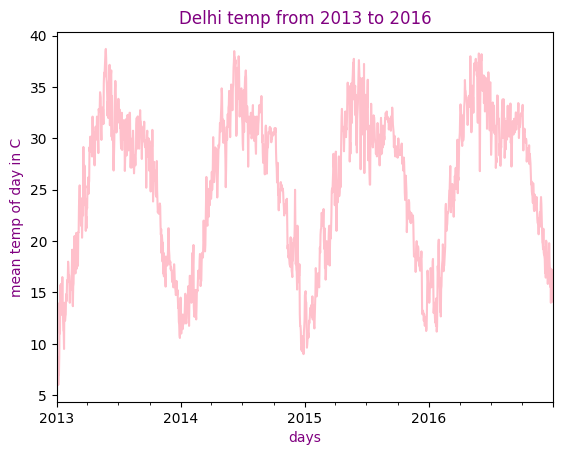

In [ ]:
temp = Delhi['meantemp'] # feature selection
temp.plot(color = 'pink')
plt.title("Delhi temp from 2013 to 2016", color = 'purple')
plt.xlabel("days", color = 'purple')
plt.ylabel("mean temp of day in C", color = 'purple')

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5 # to decide the number it will study
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((1456, 5, 1), (1456,))

In [ ]:
# Split the data to train, validation, and test
X_train, y_train = X[:700], y[:700]
X_val, y_val = X[700:1000], y[700:1000]
X_test, y_test = X[1000:], y[1000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((700, 5, 1), (700,), (300, 5, 1), (300,), (456, 5, 1), (456,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)# to store the best model from our epoch
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
22/22 [==============================] - 7s 229ms/step - loss: 315.7232 - root_mean_squared_error: 17.7686 - val_loss: 62.4115 - val_root_mean_squared_error: 7.9001
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 59.6082 - root_mean_squared_error: 7.7206 - val_loss: 63.3317 - val_root_mean_squared_error: 7.9581
Epoch 3/10
22/22 [==============================] - 4s 195ms/step - loss: 51.4499 - root_mean_squared_error: 7.1729 - val_loss: 59.1113 - val_root_mean_squared_error: 7.6884
Epoch 4/10
22/22 [==============================] - 4s 167ms/step - loss: 46.3232 - root_mean_squared_error: 6.8061 - val_loss: 52.0955 - val_root_mean_squared_error: 7.2177
Epoch 5/10
22/22 [==============================] - 4s 206ms/step - loss: 35.8127 - root_mean_squared_error: 5.9844 - val_loss: 34.0219 - val_root_mean_squared_error: 5.8328
Epoch 6/10
22/22 [==============================] - 4s 208ms/step - loss: 18.0240 - root_mean_squared_error: 4.2455 - val_loss: 12

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

22/22 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,9.582779,7.000000
1,9.674574,7.000000
2,9.705003,8.857143
3,10.162646,14.000000
4,12.400643,11.000000
...,...,...
695,19.634861,21.375000
696,20.754971,25.000000
697,24.824903,21.250000
698,21.481720,17.750000


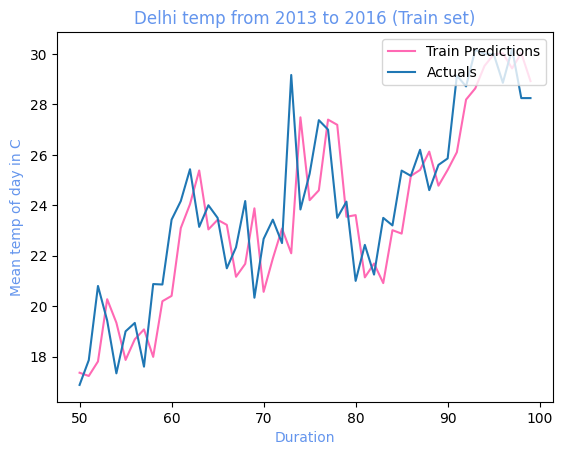

In [ ]:
plt.plot(train_results['Train Predictions'][50:100],color = 'hotpink',label = 'Train Predictions')
plt.plot(train_results['Actuals'][50:100], label = 'Actuals')
plt.title("Delhi temp from 2013 to 2016 (Train set)", color ='cornflowerblue')
plt.xlabel("Duration", color = 'cornflowerblue')
plt.ylabel("Mean temp of day in C", color = 'cornflowerblue')
leg = plt.legend(loc='upper right')

In [ ]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

10/10 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,18.445496,17.250000
1,17.645866,17.000000
2,17.358528,15.285714
3,16.318716,21.500000
4,20.977552,19.625000
...,...,...
295,28.969759,28.250000
296,28.656315,29.000000
297,29.088226,29.000000
298,29.135347,28.125000


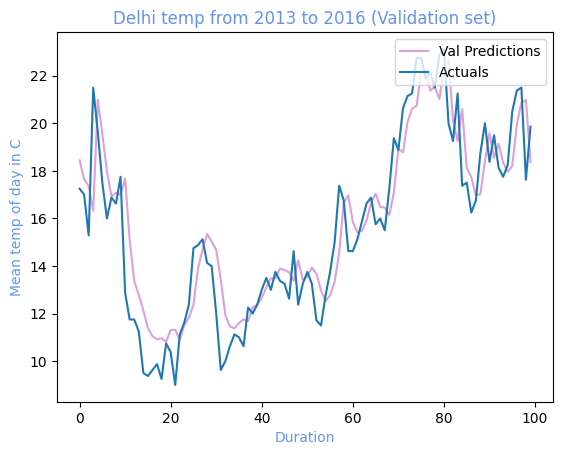

In [ ]:
plt.plot(val_results['Val Predictions'][:100],color = 'plum', label ="Val Predictions" )
plt.plot(val_results['Actuals'][:100], label = "Actuals")
plt.title("Delhi temp from 2013 to 2016 (Validation set)", color ='cornflowerblue')
plt.xlabel("Duration", color = 'cornflowerblue')
plt.ylabel("Mean temp of day in C", color = 'cornflowerblue')
leg = plt.legend(loc='upper right')

In [ ]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

15/15 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,28.614466,30.000000
1,29.615135,29.000000
2,29.222008,28.875000
3,29.145905,28.375000
4,28.853928,28.625000
...,...,...
451,16.716421,16.850000
452,17.045870,17.217391
453,17.320091,15.238095
454,16.299866,14.095238


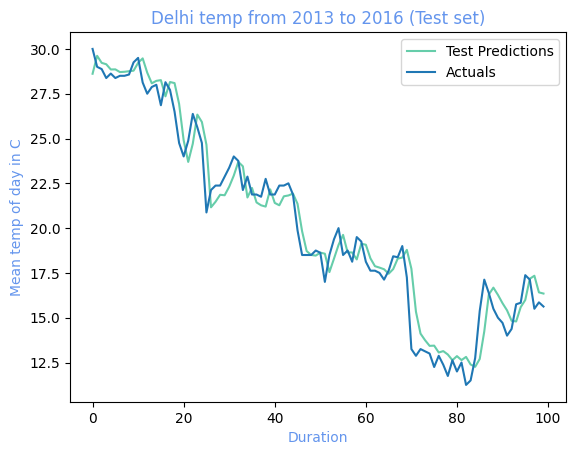

In [ ]:
plt.plot(test_results['Test Predictions'][:100], color = 'mediumaquamarine', label = 'Test Predictions')
plt.plot(test_results['Actuals'][:100], label = 'Actuals')
plt.title("Delhi temp from 2013 to 2016 (Test set)", color ='cornflowerblue')
plt.xlabel("Duration", color = 'cornflowerblue')
plt.ylabel("Mean temp of day in C", color = 'cornflowerblue')
leg = plt.legend(loc='upper right')